In [145]:
#Nama   : Mia Amaliah
#NIM    : 1202922002
#Tugas : Multinomial Regression

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from collections import Counter


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/network-detection/Train.txt


In [146]:
data = pd.read_csv("/kaggle/input/network-detection/Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [147]:
data.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate   

In [148]:
#melihat jumlah datanya 

data.shape

(125973, 43)

In [149]:
#mendelete variable pada dataset

data.drop(['protocoltype','service','flag'],axis=1,inplace=True)


In [150]:
#cek data setelah di drop untuk ke -3 variable tersebut
data.head ()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [151]:
#cek apakah ada data yang kosong
data.isna().sum()

duration                  0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate

In [152]:
#merubah data pada variable attack menjadi numerik

data['attack'] = data['attack'].replace({'back':0,'buffer_overflow':1,'ftp_write':2,'guess_passwd':3,'imap':4,'ipsweep':5,'land':6,'loadmodule':7,'multihop':8,
                                   'neptune':9,'nmap':10,'normal':11,'perl':12,'phf':13,'pod':14,'portsweep':15,'rootkit':16,'satan':17,'smurf':18,'teardrop':19,'warezclient':20,
                                   'warezmaster':21,'spy':22})

data.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
2,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21


In [153]:
#merubah type data object pada attack menjadi integer

data['attack'] = data.attack.astype(int)
data.dtypes

duration                    int64
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate               float64
srvdiffhostrate           float64
dsthostcount                int64
dsthostsrvcoun

In [154]:
#menentukan nilai x dan y

x=data.drop(['attack'],axis=1).values
y=data['attack'].values

print (x)
print (y)

[[0.000e+00 4.910e+02 0.000e+00 ... 5.000e-02 0.000e+00 2.000e+01]
 [0.000e+00 1.460e+02 0.000e+00 ... 0.000e+00 0.000e+00 1.500e+01]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.900e+01]
 ...
 [0.000e+00 2.231e+03 3.840e+02 ... 1.000e-02 0.000e+00 1.800e+01]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.000e+01]
 [0.000e+00 1.510e+02 0.000e+00 ... 0.000e+00 0.000e+00 2.100e+01]]
[11 11  9 ... 11  9 11]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='attack', ylabel='count'>

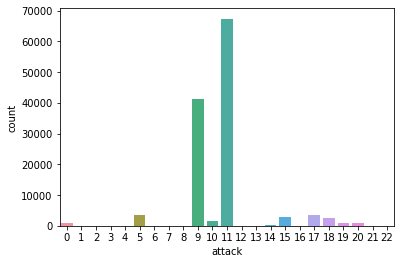

In [155]:
#menvisualisasikan  jumlah dari variable y = attack

sns.countplot(data['attack'])

In [156]:
#melihat jumlah class dari variable y

print("Class distribution: {}".format(Counter(y)))

Class distribution: Counter({11: 67343, 9: 41214, 17: 3633, 5: 3599, 15: 2931, 18: 2646, 10: 1493, 0: 956, 19: 892, 20: 890, 14: 201, 3: 53, 1: 30, 21: 20, 6: 18, 4: 11, 16: 10, 7: 9, 2: 8, 8: 7, 13: 4, 12: 3, 22: 2})


In [157]:
#menentukan data training dan dan testing dengan perbandingan 70:30

x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.3,random_state =1)
print (x_train)
print (y_train)



[[0.0000e+00 1.0044e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.8000e+01]
 [0.0000e+00 1.9800e+02 2.9300e+02 ... 0.0000e+00 0.0000e+00 2.1000e+01]
 [0.0000e+00 1.0320e+03 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.8000e+01]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 2.1000e+01]
 [0.0000e+00 2.4600e+02 3.7490e+03 ... 0.0000e+00 4.2000e-01 2.1000e+01]
 [0.0000e+00 4.4000e+01 4.4000e+01 ... 0.0000e+00 0.0000e+00 2.0000e+01]]
[11 11 18 ...  9 11 11]


In [158]:
#menggunakan model logistic regression - multinomial

datamodel=LogisticRegression()
datamodel.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [165]:
# membuat model prediksi data

datamodel.predict(x_test)
x_test

array([[0.000e+00, 4.500e+01, 1.350e+02, ..., 0.000e+00, 0.000e+00,
        2.000e+01],
       [0.000e+00, 5.200e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.800e+01],
       [0.000e+00, 3.000e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.100e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+01],
       [0.000e+00, 1.445e+03, 3.300e+02, ..., 0.000e+00, 0.000e+00,
        2.100e+01]])

In [166]:
#menghitung prediksi nilai dari data testing 

datamodel.score(x_test,y_test)

0.8303344623200677

In [161]:
predicted_output = datamodel.predict(x_test)
predicted_output

array([11, 11, 11, ...,  9,  9, 11])

In [162]:
#menbandingkan nilai aktual dengan nilai hasil prediksi model

cm=confusion_matrix(y_test,predicted_output)
cm

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   270,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     3,     0,     0,     0,     9,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,    23,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
           71,     0,  1042,     0

In [163]:
# hasil report dari nilai precison,recall,f1-score dari hasil data aktual dan prediksi per class
#Precision adalah peluang kasus yang diprediksi positif yang pada kenyataannya termasuk kasus kategori positif.
#Recall adalah peluang kasus dengan kategori positif yang dengan tepat diprediksi positif.
#Nilai F1-Score atau dikenal juga dengan nama F-Measure didapatkan dari hasil Precision dan Recall antara kategori hasil prediksi dengan kategori sebenarnya.

print (classification_report(y_test,predicted_output))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       271
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00      1114
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.88      0.94      0.91     12283
          10       0.00      0.00      0.00       461
          11       0.83      0.97      0.89     20266
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        46
          15       0.30      0.36      0.33       821
          16       0.00      0.00      0.00         3
          17       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(204.0, 0.5, 'Actual Value')

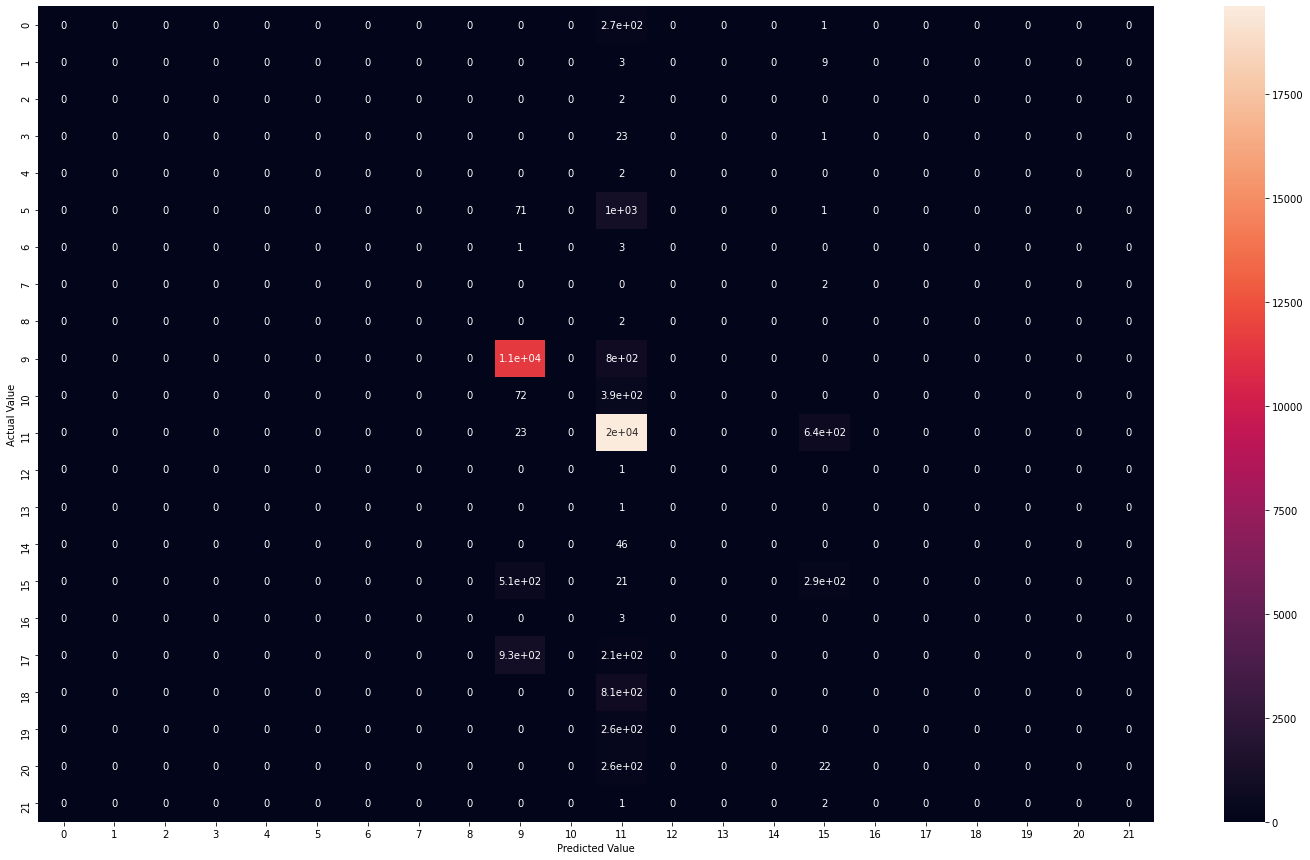

In [164]:
plt.figure(figsize=(25,15))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')